## 5 qubits GHZ state

## Machine Topology
![ibmq Belem topology](./ibmq_belem_topology.png)

## Circuit
![circuit](./circuit.png)

---

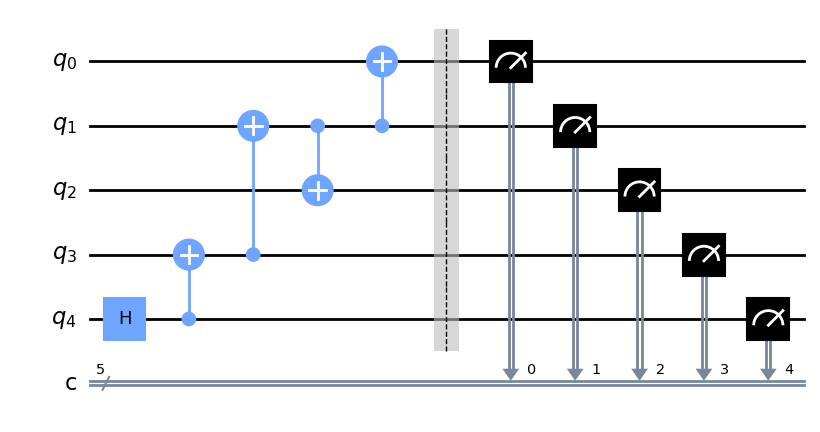

In [18]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, transpile

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[4])
circuit.cx(qreg_q[4], qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[0])

circuit.barrier()

circuit.measure(qreg_q, creg_c)
circuit.draw("mpl")

In [7]:
sim = Aer.get_backend("aer_simulator")
results = sim.run(circuit).result()

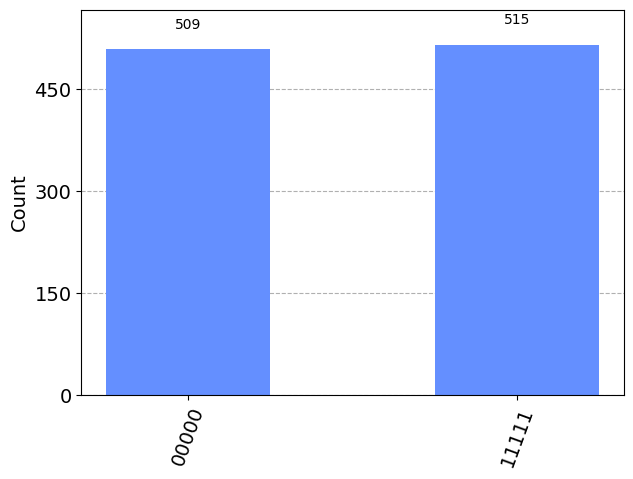

In [8]:
from qiskit.visualization import plot_histogram
plot_histogram(results.get_counts())

In [9]:
from qiskit_ibm_provider import IBMProvider

In [14]:
import os
from dotenv import load_dotenv
load_dotenv()

IBMProvider.save_account(token=os.getenv('IBM_API_TOKEN'))

AccountAlreadyExistsError: 'Named account (default-ibm-quantum) already exists. Set overwrite=True to overwrite.'

In [16]:
provider = IBMProvider()
print(provider.backends())

[<IBMBackend('ibmq_belem')>, <IBMBackend('simulator_statevector')>, <IBMBackend('ibm_perth')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('ibmq_lima')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibmq_manila')>, <IBMBackend('ibm_nairobi')>, <IBMBackend('ibm_lagos')>, <IBMBackend('ibmq_quito')>, <IBMBackend('ibmq_jakarta')>]


In [17]:
machine = provider.get_backend('ibmq_belem')

In [21]:
circuit_transpiled = transpile(circuit, backend=machine)
job = machine.run(circuit_transpiled, shots=1024)

In [22]:
job.status()

<JobStatus.QUEUED: 'job is queued'>